<a href="https://colab.research.google.com/github/samobrien878/linearRegression/blob/main/Copy_of_assignment_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/DS3001/linearRegression/main/data/Q1_clean.csv'
df = pd.read_csv(url)
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [ ]:
neighborhood = df.groupby('Neighbourhood ')['Price'].mean()
neighborhood = neighborhood.sort_values(ascending=False)
ratings = df.groupby('Neighbourhood ')['Review Scores Rating'].mean()
ratings = ratings.sort_values(ascending=False)
print('PRICE')
print(neighborhood)
print('RATINGS')
print(ratings)

PRICE
Neighbourhood 
Manhattan        183.664286
Staten Island    146.166667
Brooklyn         127.747378
Queens            96.857233
Bronx             75.276498
Name: Price, dtype: float64
RATINGS
Neighbourhood 
Brooklyn         92.363497
Manhattan        91.801496
Bronx            91.654378
Queens           91.549057
Staten Island    90.843750
Name: Review Scores Rating, dtype: float64


Manhattan is the most expensive on average. 183.

In [ ]:
df['Log Price'] = np.log(df['Price'])

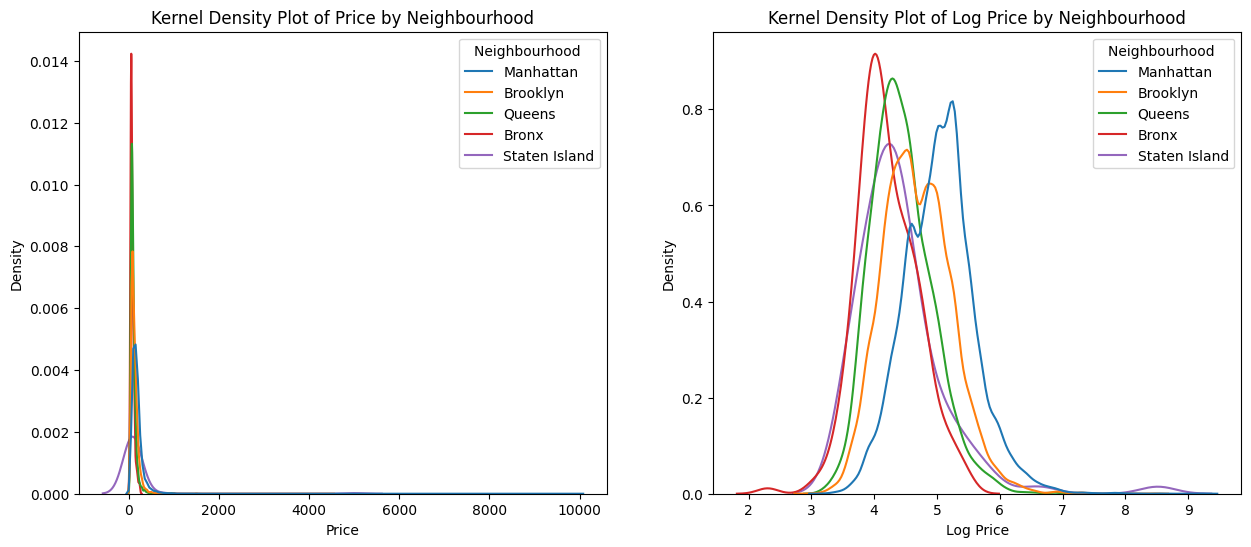

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.kdeplot(data=df, x='Price', hue='Neighbourhood ', ax=axes[0], common_norm=False)
axes[0].set_title('Kernel Density Plot of Price by Neighbourhood')

sns.kdeplot(data=df, x='Log Price', hue='Neighbourhood ', ax=axes[1], common_norm=False)
axes[1].set_title('Kernel Density Plot of Log Price by Neighbourhood')

plt.show()

In [ ]:
y = df['Price']
x = pd.get_dummies(df['Neighbourhood '], drop_first=True)

from sklearn import linear_model
regression_model = linear_model.LinearRegression(fit_intercept=False)
regression_model.fit(x, y)

results = pd.DataFrame({'variable':regression_model.feature_names_in_, 'coefficient': regression_model.coef_}) # Regression coefficients
results

,variable,coefficient
0,Brooklyn,127.747378
1,Manhattan,183.664286
2,Queens,96.857233
3,Staten Island,146.166667


It appears that, in relation to the neighborhood dropped (bronx) manhattan is once again the most expensive place to live in New York. This is consistent with the graph made in part one and the analysis in part one where all of the coefficients are the same as the averages. This makes sense as we are not using a intercept in this analysis, so the model is forced to start at (0,0) and follow the average.

In [ ]:
y = df['Price']
x = pd.get_dummies(df['Neighbourhood '], drop_first=True)

from sklearn import linear_model
regression_model = linear_model.LinearRegression(fit_intercept=True)
regression_model.fit(x, y)

results = pd.DataFrame({'variable':regression_model.feature_names_in_, 'coefficient': regression_model.coef_}) # Regression coefficients
results

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


Bronx has become the reference category, and all other coefficients stem from that intercept. The coefficients are representative of how much more expensive each neighborhood is on average. To get the same answers as previously found (just the mean prices) you can add the value of the intercept to each:

In [ ]:
results = pd.DataFrame({'variable':regression_model.feature_names_in_,
                        'coefficient': regression_model.coef_+regression_model.intercept_})
results

,variable,coefficient
0,Brooklyn,127.747378
1,Manhattan,183.664286
2,Queens,96.857233
3,Staten Island,146.166667


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x = df[['Review Scores Rating', 'Neighbourhood ']]
y = df['Price']
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=.20,random_state=7)

z_train = pd.concat([x_train['Review Scores Rating'],
                     pd.get_dummies(x_train['Neighbourhood '], dtype='int')], axis = 1)
z_test = pd.concat([x_test['Review Scores Rating'],
                    pd.get_dummies(x_test['Neighbourhood '], dtype='int')], axis = 1)

regression_model = linear_model.LinearRegression(fit_intercept=False)
regression_model.fit(z_train, y_train)

predicted = regression_model.predict(z_test)
print('Rsq: ', regression_model.score(z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - predicted)**2 ))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':regression_model.feature_names_in_, 'coefficient': regression_model.coef_}) # Regression coefficients
results


Rsq:  0.0555394989043535
RMSE:  138.06429695506702


,variable,coefficient
0,Review Scores Rating,0.957349
1,Bronx,-10.849081
2,Brooklyn,38.398107
3,Manhattan,95.970851
4,Queens,9.522659
5,Staten Island,67.840027


The coefficient is 1 for review score ratings. Meaning that for every unit increaese in the review score, price goes up by $1? Manhattan is by far the most expensive place to rent a property!

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x = df[['Review Scores Rating', 'Neighbourhood ', 'Property Type']]
y = df['Price']

x_dummies = pd.get_dummies(x, columns=['Neighbourhood ', 'Property Type'], dtype='int')

x_train, x_test, y_train, y_test, = train_test_split(x_dummies, y, test_size=.20,random_state = 7)


regression_model = linear_model.LinearRegression(fit_intercept=False)
regression_model.fit(x_train, y_train)

predicted = regression_model.predict(x_test)
print('Rsq: ', regression_model.score(x_test,y_test))
rmse = np.sqrt( np.mean( (y_test - predicted)**2 ))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':regression_model.feature_names_in_, 'coefficient': regression_model.coef_})
results['coefficient'] = results['coefficient'].apply(lambda x: '{:.2f}'.format(x))
results


Rsq:  0.06966615553054922
RMSE:  137.0278665578128


,variable,coefficient
0,Review Scores Rating,0.94
1,Neighbourhood _Bronx,-14.39
2,Neighbourhood _Brooklyn,40.00
3,Neighbourhood _Manhattan,102.29
4,Neighbourhood _Queens,9.81
5,Neighbourhood _Staten Island,57.07
6,Property Type_Apartment,-6.17
7,Property Type_Bed & Breakfast,-31.42
8,Property Type_Boat,55.74
9,Property Type_Bungalow,48.13


In short, the coefficent on review score ratings changed due to the interplay property type has on its influence. It is slightly lower after introducing property type, so we can assume that some of the ratings review score is explained partly by the type of property. As a whole, both neighbourhood and rating are partly explained by property type, thats why there is a change in their coefficients when we control for that variable.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

In [2]:
import pandas as pd
df = pd.read_csv("scores.csv")

In [3]:
df.columns

Index(['School ID', 'School Name', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested'],
      dtype='object')

In [4]:
df = df.dropna()

In [5]:
percent_columns = ['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent Tested']

for col in percent_columns:
    df[col] = df[col].str.replace('%', '').astype(float) / 100

In [6]:
df['Superscore'] = df['Average Score (SAT Math)'] + df['Average Score (SAT Writing)'] + df['Average Score (SAT Reading)']

In [7]:
y = df['Superscore']
x = pd.get_dummies(df['Borough'], drop_first=True)

from sklearn import linear_model
regression_model = linear_model.LinearRegression(fit_intercept=True)
regression_model.fit(x, y)

results = pd.DataFrame({'variable':regression_model.feature_names_in_, 'coefficient': regression_model.coef_}) # Regression coefficients
results

,variable,coefficient
0,Brooklyn,27.532391
1,Manhattan,137.410342
2,Queens,140.701981
3,Staten Island,236.275510


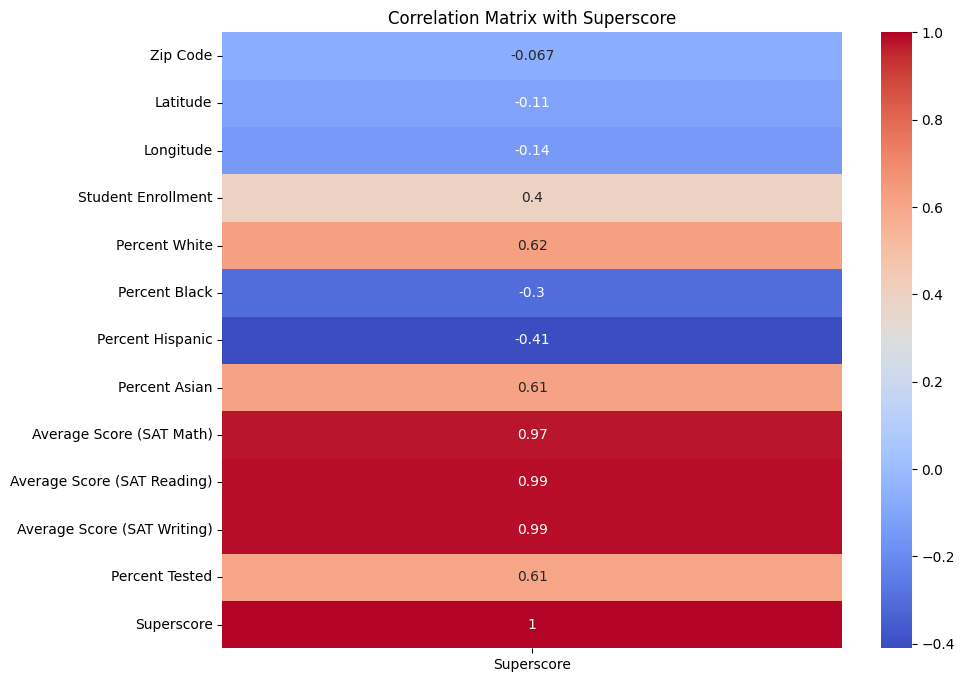

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix, only considering numeric columns.
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Superscore']], annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Superscore')
plt.show()

Looks like the races, the % of school tested, and student enrollment, are all usable metrics here

In [9]:
X = df[['Borough', 'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Student Enrollment','Percent Tested']]
y = df['Superscore']

X = pd.get_dummies(X, columns=['Borough'], drop_first=True)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.log1p(X_train)
X_test = np.log1p(X_test)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions_log_normalized = np.log1p(predictions)

mse = mean_squared_error(y_test, predictions)
mse_log_normalized = mean_squared_error(np.log1p(y_test), predictions_log_normalized)
r2 = r2_score(y_test, predictions)
r2_log_normalized = r2_score(np.log1p(y_test), predictions_log_normalized)

print(f"R-squared (Original Predictions): {r2:.4f}")
print(f"R-squared (Log-Normalized Predictions): {r2_log_normalized:.4f}")
print(f"Mean Squared Error (Original Predictions): {mse:.4f}")
print(f"Mean Squared Error (Log-Normalized Predictions): {mse_log_normalized:.4f}")

R-squared (Original Predictions): 0.6658
R-squared (Log-Normalized Predictions): 0.6286
Mean Squared Error (Original Predictions): 14014.6517
Mean Squared Error (Log-Normalized Predictions): 0.0077


These seem like drastic coefficients in relation to superscore, even if the score is higher because its the older test (out of 2100 or something), likely need to normalize.

- using lasso to try and build something better

In [28]:
from sklearn.linear_model import Lasso

df.dropna(subset=['Superscore', 'Student Enrollment', 'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian'], inplace=True)

target = 'Superscore'
features = ['Student Enrollment', 'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Borough']

X = df[['Borough', 'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Student Enrollment', 'Percent Tested']]
y = df[target]

X = pd.get_dummies(X, columns=['Borough'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=1.0)  # alpha controls the regularization strength
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


R-squared: 0.6243
Mean Squared Error: 15752.4141


It doesnt improve from the original model. Lets visualize the simplier model which is just my selections based upon the heat chart.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.log1p(X_train)
X_test = np.log1p(X_test)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions_log_normalized = np.log1p(predictions)

mse = mean_squared_error(y_test, predictions)
mse_log_normalized = mean_squared_error(np.log1p(y_test), predictions_log_normalized)
r2 = r2_score(y_test, predictions)
r2_log_normalized = r2_score(np.log1p(y_test), predictions_log_normalized)

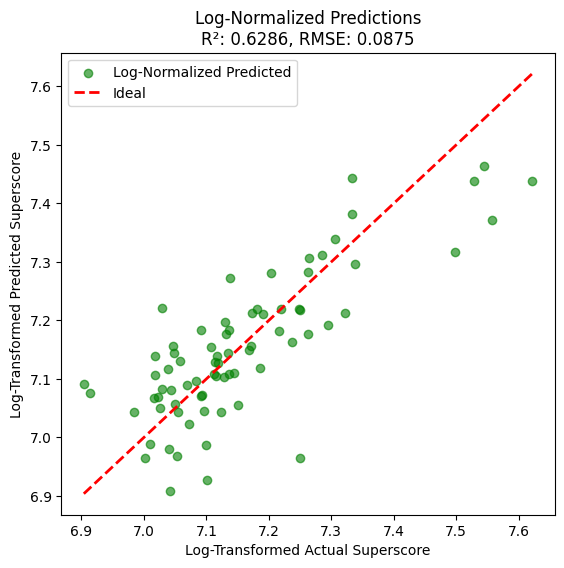

In [33]:
import matplotlib.pyplot as plt


rmse = np.sqrt(mse)
rmse_log_normalized = np.sqrt(mse_log_normalized)

# Plotting the results
plt.figure(figsize=(14, 6))

# Log-Normalized Predictions Plot
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(y_test), predictions_log_normalized, color='green', alpha=0.6, label='Log-Normalized Predicted')
plt.plot([np.log1p(y_test).min(), np.log1p(y_test).max()], [np.log1p(y_test).min(), np.log1p(y_test).max()], 'r--', linewidth=2, label='Ideal')
plt.xlabel("Log-Transformed Actual Superscore")
plt.ylabel("Log-Transformed Predicted Superscore")
plt.title(f"Log-Normalized Predictions\nR²: {r2_log_normalized:.4f}, RMSE: {rmse_log_normalized:.4f}")
plt.legend()


plt.show()
